In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import math

## Lecture 22 Assignment

### Consider the following two a priori probability distributions for pH, the probability that a randomly selected coin comes up heads:

### A.
#### c * exp(-a * abs(pH - 0.5)), where a>0 is a parameter to vary the "peakiness" of the distribution, and for each value of a  you consider, there is some c that makes the probabilities sum to 1

1. Create stats.rv_discrete objects to model the random variable for at least two different values of the a priori distribution's parameter (a or p). Plot the PMF and CDF.

In [2]:
def fxn_A(x, a):
    return math.exp(-a * abs(x - 0.5))

fxn_A_v = np.vectorize(fxn_A) 

def rv_A(a = 20):
    vals = np.linspace(0,1,101)
    unnorm = fxn_A_v(vals, a)
    probs = unnorm/sum(unnorm)
    ap = stats.rv_discrete(values=(range(len(probs)),probs))
    return vals, probs, ap

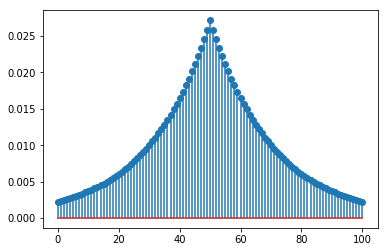

In [3]:
vals1,probs1,ap1 = rv_A(a = 5)
plt.stem(ap1.pmf(range(len(probs1))));

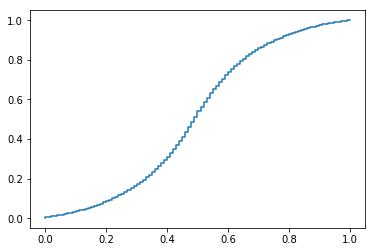

In [4]:
plt.step(vals1,np.cumsum(probs1));

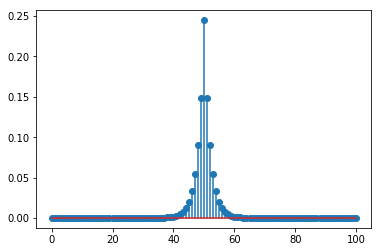

In [5]:
vals2,probs2,ap2 = rv_A(a = 50)
plt.stem(ap2.pmf(range(len(probs2))));

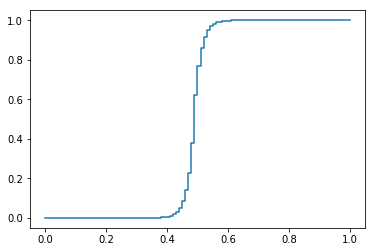

In [6]:
plt.step(vals2,np.cumsum(probs2));

2. Find and plot the a posteriori probabilities for getting 8 heads on 8 flips of a fair coin for each of the example a priori distributions.

In [7]:
def exact_coins(vals, ap, flips, plot = True, target=-1, num_sims=100000):
    
    if target==-1:
        target=flips
            
    events=[]
    for sim in range(num_sims):
        prob_heads=vals[ap.rvs()] # grab a random index and map it back to the value
        R=npr.uniform(size=flips)
        num_heads=np.sum(R<prob_heads)
        if num_heads==target:
            events+=[prob_heads]
    
    if plot:
        vals,counts=np.unique(events,return_counts=True)
        plt.bar(vals,counts/len(events),width=0.01) # Note that we had to change the bar width here!!!
    
    return events

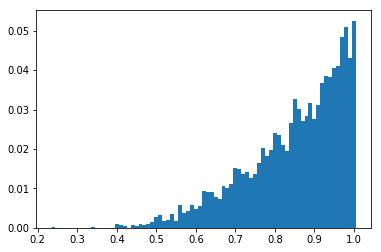

In [8]:
exact_coins(vals1,ap1,8);

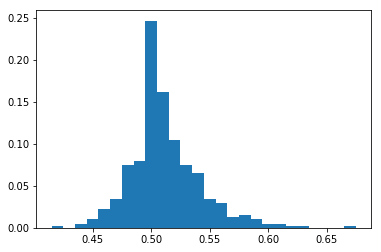

In [9]:
exact_coins(vals2,ap2,8);

3. For a priori distribution A, what is the (approximate) minimum value of the parameter a such that the fair coin falls in the 95% confidence interval?

In [10]:
def confidence_interval(data, C, plot=True):
    ''' Find the C% confidence interval given data'''
    pbar=1-C/100

    vals,counts=np.unique(data,return_counts=True)


    sum_counts=np.cumsum(counts/len(data))
    # locate the lowest value for which the cumulative sum exceeds the specified probability
    lower=np.nonzero(sum_counts>=pbar/2)[0][0]
    upper=np.nonzero(sum_counts>=(1-pbar/2))[0][0]
    
    if plot:
#         fig, ax = plt.subplots()
        plt.bar(vals,sum_counts,width=0.01)
        plt.plot(vals,[pbar/2]*len(vals),'r')
        plt.plot(vals,[(1-pbar/2)]*len(vals),'g')
        print(C,"% confidence interval:[",vals[lower],",",vals[upper],"]")
    
    return lower,upper

The maximum value of a that does NOT contain the fair coin is a = 19.


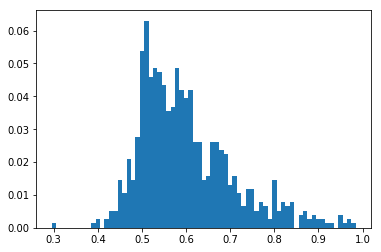

In [11]:
min_a_val = -1
events = []
for a in range(1,30,3):
    vals,probs,ap = rv_A(a = a)
    events = exact_coins(vals,ap,8,plot=False)
    lower,upper = confidence_interval(events,95,plot=False)
#     print("a = ", a, "\t->\t", vals[lower],", ", vals[upper],sep="")
    if ( not (vals[lower] <= 0.50 <= vals[upper]) ) :
        min_a_val = a
        break
# minimum value a that contains the fair coin = maximum value of a that does NOT contain the fair coin in the 95% interval
print("The maximum value of a that does NOT contain the fair coin is a = ",min_a_val,".",sep="")
exact_coins(vals,ap,8,plot=True);
# confidence_interval(events,95,plot=True);

### B.
#### P[pH = 0.5] = p, and the remaining probability is uniformly distributed between 0 and 1. Here p is a parameter that you can vary.

1. Create stats.rv_discrete objects to model the random variable for at least two different values of the a priori distribution's parameter (a or p). Plot the PMF and CDF.

In [12]:
def rv_B(p = .5):
    if not (0 <= p <= 1):
        return False
    vals = np.linspace(0,1,101)
    other_probs = (1-p)/100
    probs=np.array([other_probs]*50+[p]+[other_probs]*50)
    
    ap = stats.rv_discrete(values=(range(len(probs)),probs))
    return vals, probs, ap

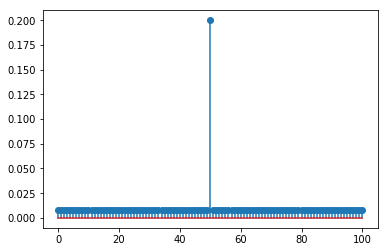

In [13]:
vals3,probs3,ap3 = rv_B(0.2)
plt.stem(ap3.pmf(range(len(probs3))));

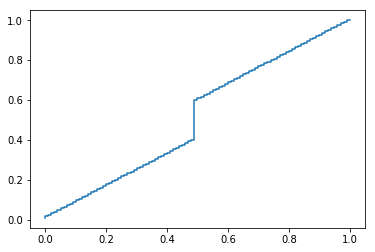

In [14]:
plt.step(vals3,np.cumsum(probs3));

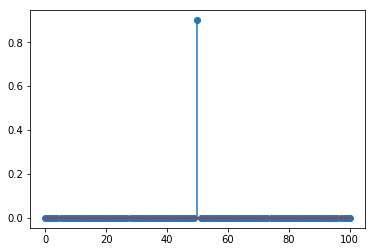

In [15]:
vals4,probs4,ap4 = rv_B(0.90)
plt.stem(ap4.pmf(range(len(probs4))));

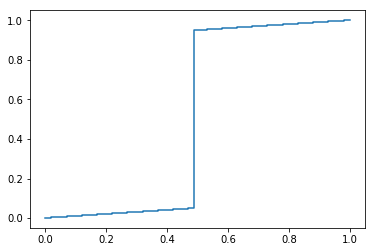

In [16]:
plt.step(vals4,np.cumsum(probs4));

2. Find and plot the a posteriori probabilities for getting 8 heads on 8 flips of a fair coin for each of the example a priori distributions.

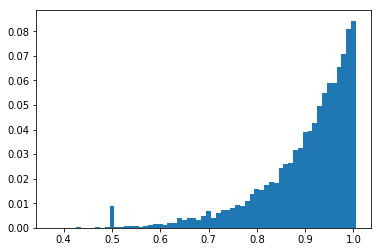

In [17]:
exact_coins(vals3,ap3,8);

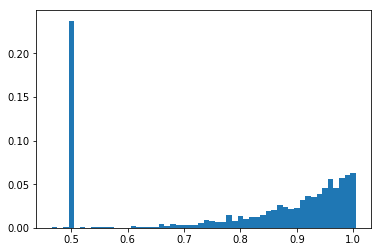

In [18]:
exact_coins(vals4,ap4,8);

4. For a priori distribution B, what is the (approximate) minimum value of the parameter p such that the fair coin falls in the 95% confidence interval?

In [19]:
min_p_val = -1
events = []
for p in range(1,100,5):
    vals,probs,ap = rv_B(p = p/100)
    events = exact_coins(vals,ap,8,plot=False)
    lower,upper = confidence_interval(events,95,plot=False)
#     print("a = ", a, "\t->\t", vals[lower],", ", vals[upper],sep="")
    if ( not (vals[lower] <= 0.50 <= vals[upper]) ) :
        min_p_val = p
        break

The maximum value of p that does NOT contain the fair coin is approximately p = 81.
0.02 0.49


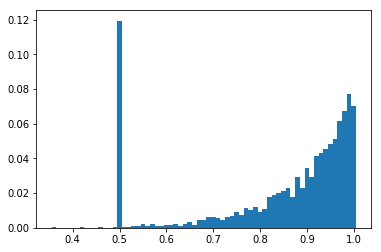

In [20]:
# minimum value p that contains the fair coin = maximum value of p that does NOT contain the fair coin in the 95% interval
print("The maximum value of p that does NOT contain the fair coin is approximately p = ",min_p_val,".",sep="")
print(vals[lower], vals[upper])
exact_coins(vals,ap,8,plot=True);
# confidence_interval(events,95,plot=True);